In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [5]:
print(df.describe(include='all'))

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1000.000000    1000.000000

In [7]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [8]:
# Clean column names for easier access
df.columns = [col.lower().replace(" ", "_") for col in df.columns]
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [9]:
# Convert categorical columns to category dtype
categorical_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Exploratory Data Analysis (EDA)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

**Distribution of Scores**

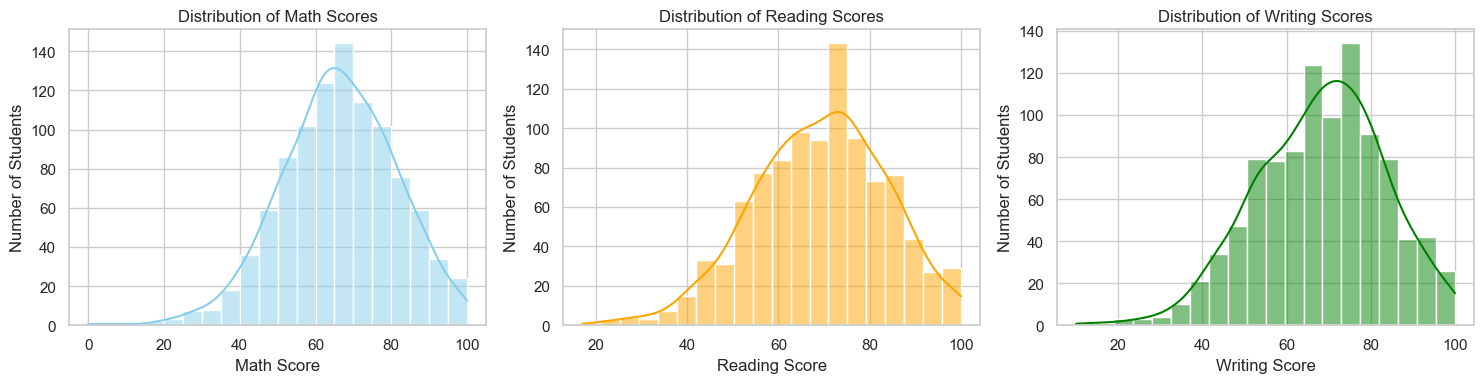

In [26]:
plt.figure(figsize=(15, 4))  # Create a wide figure

plt.subplot(1, 3, 1)
sns.histplot(df['math_score'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Number of Students")

plt.subplot(1, 3, 2)
sns.histplot(df['reading_score'], kde=True, bins=20, color='orange')
plt.title("Distribution of Reading Scores")
plt.xlabel("Reading Score")
plt.ylabel("Number of Students")

plt.subplot(1, 3, 3)
sns.histplot(df['writing_score'], kde=True, bins=20, color='green')
plt.title("Distribution of Writing Scores")
plt.xlabel("Writing Score")
plt.ylabel("Number of Students")

plt.tight_layout()
plt.show()

**Compare Scores by Gender**

C:\Users\nouaa\AppData\Local\Temp\ipykernel_4636\2494874090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='math_score', palette='pastel')
C:\Users\nouaa\AppData\Local\Temp\ipykernel_4636\2494874090.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='reading_score', palette='pastel')
C:\Users\nouaa\AppData\Local\Temp\ipykernel_4636\2494874090.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='writing_score', palette='pastel')


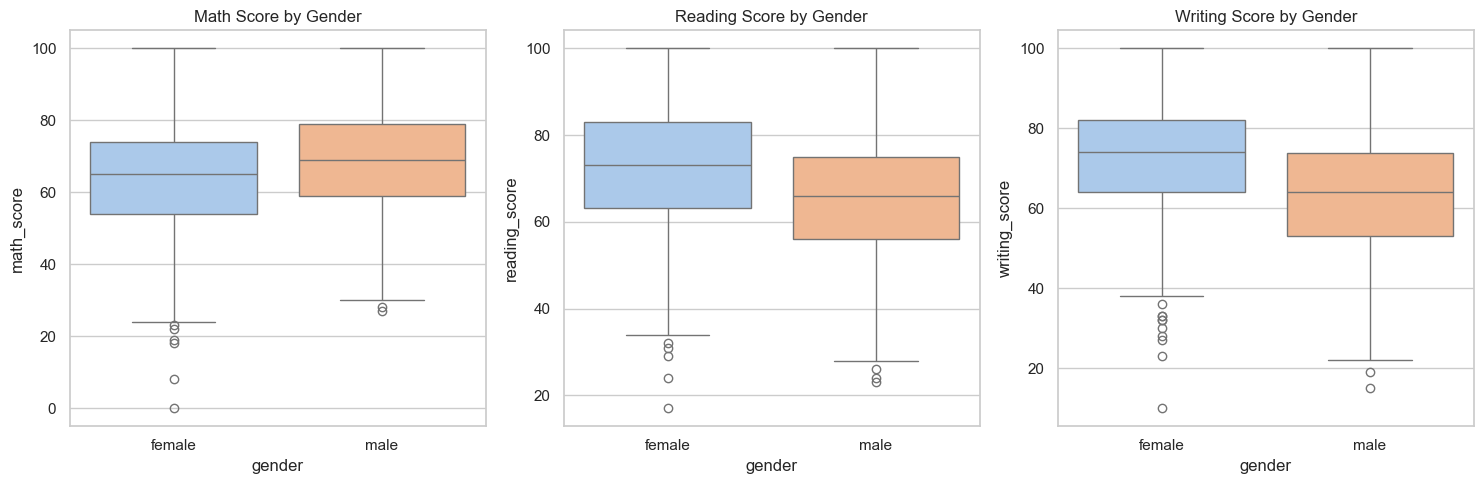

In [30]:
plt.figure(figsize=(15, 5))

# Math score by gender
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='gender', y='math_score', palette='pastel')
plt.title('Math Score by Gender')

# Reading score by gender
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='gender', y='reading_score', palette='pastel')
plt.title('Reading Score by Gender')

# Writing score by gender
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='gender', y='writing_score', palette='pastel')
plt.title('Writing Score by Gender')

plt.tight_layout()
plt.show()

**Correlation**

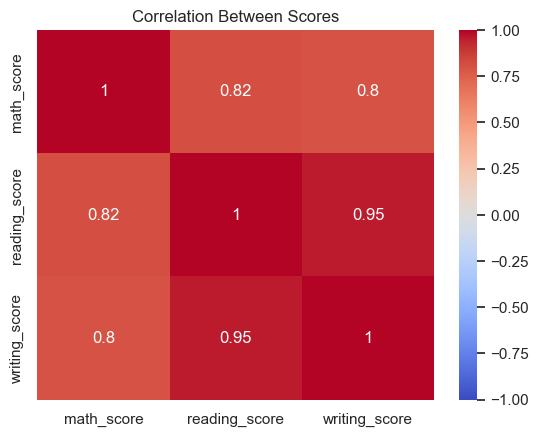

In [33]:
correlation = df[['math_score', 'reading_score', 'writing_score']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Scores")
plt.show()

**Analyze Scores by Parental Education Level**

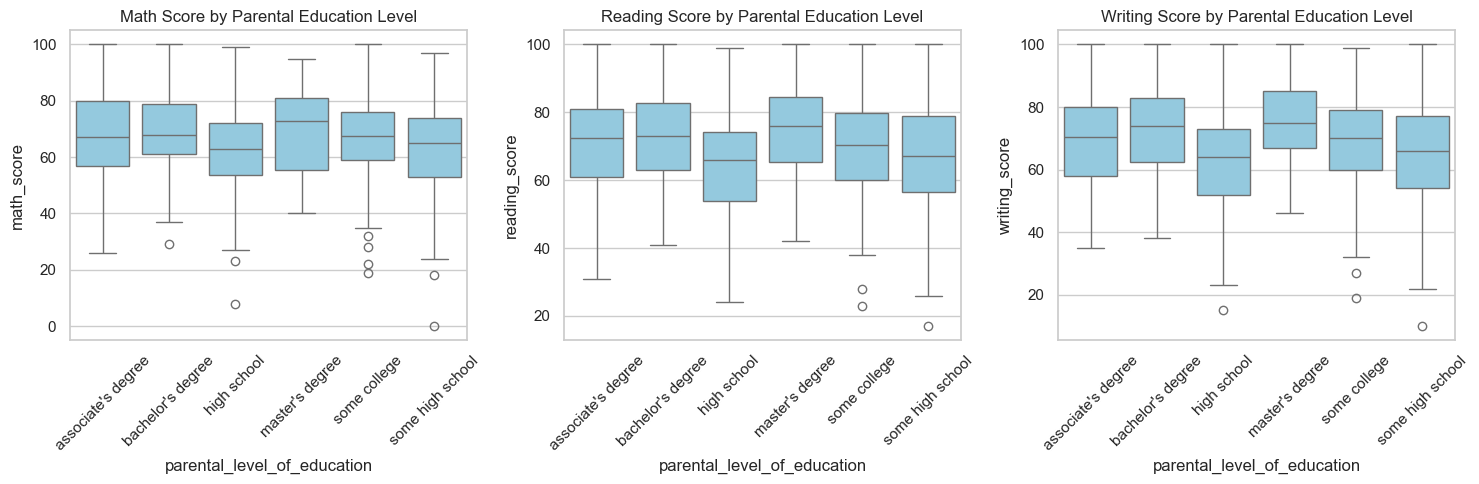

In [39]:
plt.figure(figsize=(15, 5))

# Math score by Parental Education Level
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='parental_level_of_education', y='math_score', color='skyblue')
plt.title('Math Score by Parental Education Level')
plt.xticks(rotation=45)

# Reading score by Parental Education Level
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='parental_level_of_education', y='reading_score', color='skyblue')
plt.title('Reading Score by Parental Education Level')
plt.xticks(rotation=45)

# Writing score by Parental Education Level
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='parental_level_of_education', y='writing_score', color='skyblue')
plt.title('Writing Score by Parental Education Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Analyze Scores by Test Preparation Course**

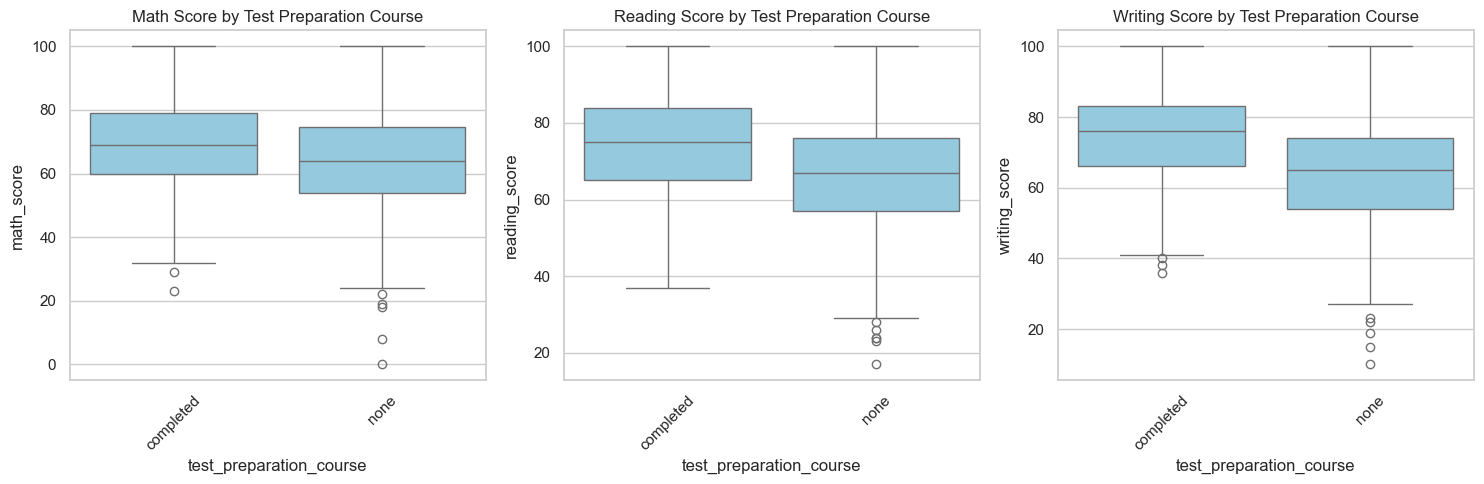

In [41]:
plt.figure(figsize=(15, 5))

# Math score by Test Preparation Course
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='test_preparation_course', y='math_score', color='skyblue')
plt.title('Math Score by Test Preparation Course')
plt.xticks(rotation=45)

# Reading score by Test Preparation Course
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='test_preparation_course', y='reading_score', color='skyblue')
plt.title('Reading Score by Test Preparation Course')
plt.xticks(rotation=45)

# Writing score by Test Preparation Course
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='test_preparation_course', y='writing_score', color='skyblue')
plt.title('Writing Score by Test Preparation Course')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Compare Scores by Lunch Type**

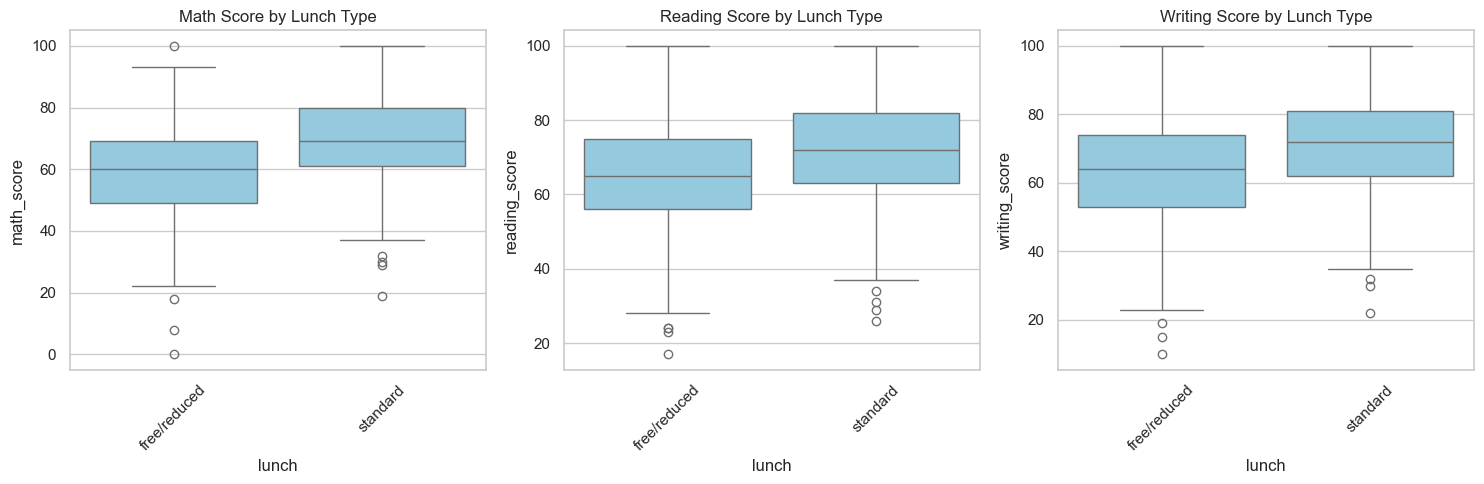

In [42]:
plt.figure(figsize=(15, 5))

# Math score by Lunch Type
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='lunch', y='math_score', color='skyblue')
plt.title('Math Score by Lunch Type')
plt.xticks(rotation=45)

# Reading score by Lunch Type
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='lunch', y='reading_score', color='skyblue')
plt.title('Reading Score by Lunch Type')
plt.xticks(rotation=45)

# Writing score by Lunch Type
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='lunch', y='writing_score', color='skyblue')
plt.title('Writing Score by Lunch Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Analyze Relationships Between Categorical Features**

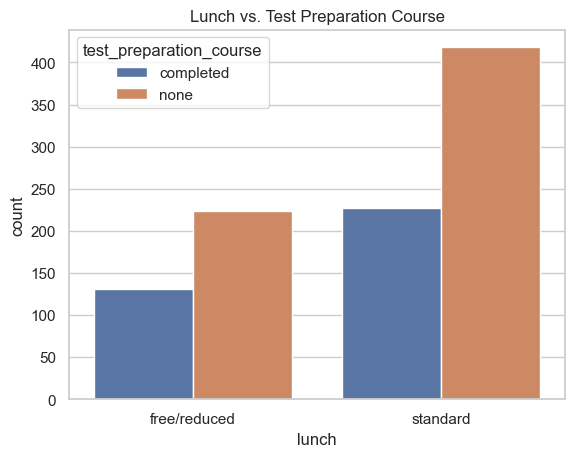

In [45]:
#lunch Vs Test Preparation course
sns.countplot(data=df, x='lunch', hue='test_preparation_course')
plt.title("Lunch vs. Test Preparation Course")
plt.show()

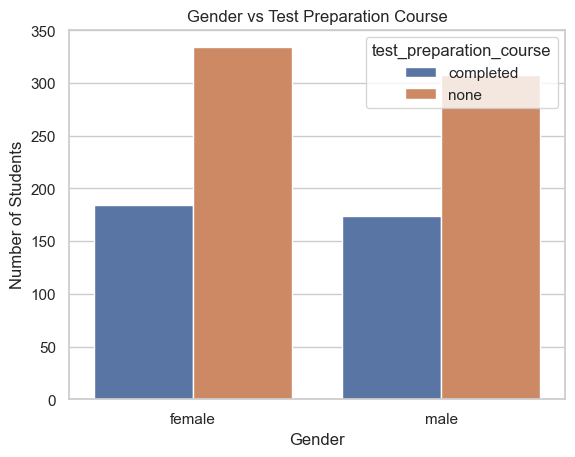

In [44]:
#Gender vs Test Preparation Course
sns.countplot(data=df, x='gender', hue='test_preparation_course')
plt.title("Gender vs Test Preparation Course")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.show()

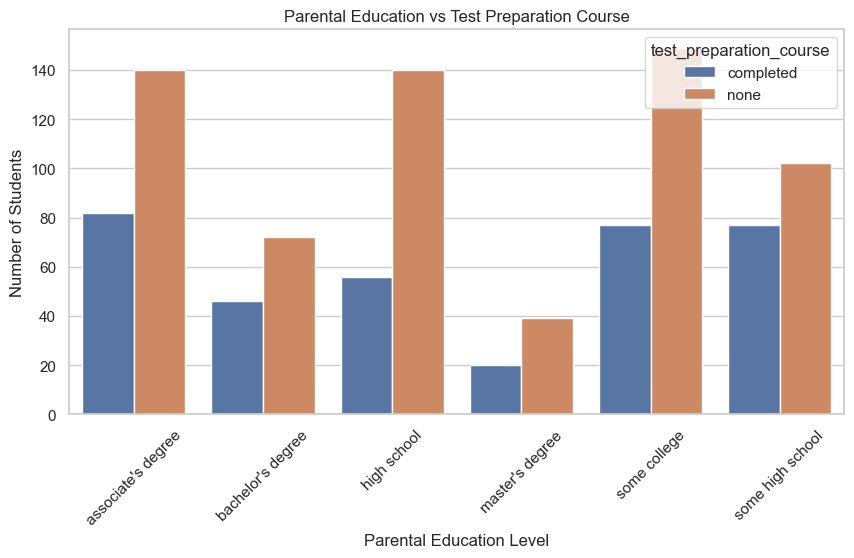

In [46]:
#Parental Education vs Test Preparation
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='parental_level_of_education', hue='test_preparation_course')
plt.xticks(rotation=45)
plt.title("Parental Education vs Test Preparation Course")
plt.xlabel("Parental Education Level")
plt.ylabel("Number of Students")
plt.show()

**Check Score Averages by Group**

In [49]:
df.groupby('test_preparation_course' , observed=False)[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


**Check for Score Gaps Based on Multiple Conditions**

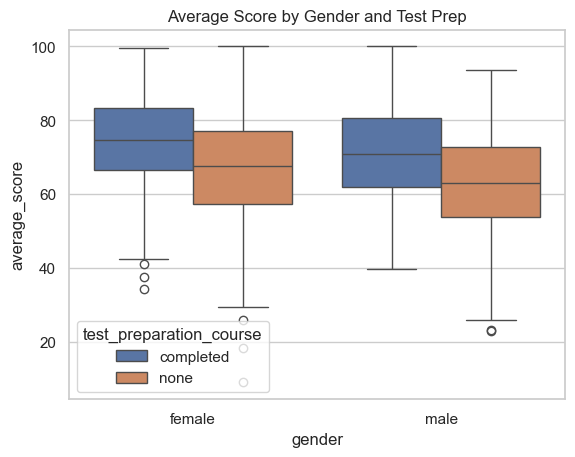

In [50]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Compare average score by gender and test preparation
sns.boxplot(data=df, x='gender', y='average_score', hue='test_preparation_course')
plt.title("Average Score by Gender and Test Prep")
plt.show()

**Explore Outliers--Extreme cases** 

In [54]:
df[df['math_score'] < 20]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
787,female,group B,some college,standard,none,19,38,32,29.666667
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [57]:
df[df['reading_score'] < 20]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
59,female,group C,some high school,free/reduced,none,0,17,10,9.0


In [58]:
df[df['writing_score'] < 20]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
596,male,group B,high school,free/reduced,none,30,24,15,23.000000


In [59]:
df[df['average_score'] < 20]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [60]:
df[df['average_score'] > 95]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
106,female,group D,master's degree,standard,none,87,100,100,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,98.666667
179,female,group D,some high school,standard,completed,97,100,100,99.000000
403,female,group D,high school,standard,completed,88,99,100,95.666667
451,female,group E,some college,standard,none,100,92,97,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
546,female,group A,some high school,standard,completed,92,100,97,96.333333
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,97.333333


**Final Summary Table**

In [62]:
summary = df.groupby('parental_level_of_education' , observed=True)[['math_score', 'reading_score', 'writing_score']].mean().round(1)
print(summary)

                             math_score  reading_score  writing_score
parental_level_of_education                                          
associate's degree                 67.9           70.9           69.9
bachelor's degree                  69.4           73.0           73.4
high school                        62.1           64.7           62.4
master's degree                    69.7           75.4           75.7
some college                       67.1           69.5           68.8
some high school                   63.5           66.9           64.9
